In [13]:
from pyspark.sql import SparkSession, functions as F

In [1]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder.appName("exploration")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

your 131072x1 screen size is bogus. expect trouble
23/08/18 12:44:24 WARN Utils: Your hostname, XMPDSE resolves to a loopback address: 127.0.1.1; using 172.28.209.92 instead (on interface eth0)
23/08/18 12:44:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/18 12:44:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
sdf_feb = spark.read.parquet('./data/tlc_data/2023-02.parquet')
sdf_feb.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [6]:
sdf_feb.schema

StructType([StructField('VendorID', IntegerType(), True), StructField('tpep_pickup_datetime', TimestampNTZType(), True), StructField('tpep_dropoff_datetime', TimestampNTZType(), True), StructField('passenger_count', LongType(), True), StructField('trip_distance', DoubleType(), True), StructField('RatecodeID', LongType(), True), StructField('store_and_fwd_flag', StringType(), True), StructField('PULocationID', IntegerType(), True), StructField('DOLocationID', IntegerType(), True), StructField('payment_type', LongType(), True), StructField('fare_amount', DoubleType(), True), StructField('extra', DoubleType(), True), StructField('mta_tax', DoubleType(), True), StructField('tip_amount', DoubleType(), True), StructField('tolls_amount', DoubleType(), True), StructField('improvement_surcharge', DoubleType(), True), StructField('total_amount', DoubleType(), True), StructField('congestion_surcharge', DoubleType(), True), StructField('Airport_fee', DoubleType(), True)])

In [9]:
sdf = spark.read.schema(sdf_feb.schema).parquet('./data/tlc_data')
sdf.limit(5)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
1,2023-02-01 00:32:53,2023-02-01 00:34:34,2,0.3,1,N,142,163,2,4.4,3.5,0.5,0.0,0.0,1.0,9.4,2.5,0.0
2,2023-02-01 00:35:16,2023-02-01 00:35:30,1,0.0,1,N,71,71,4,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-5.5,0.0,0.0
2,2023-02-01 00:35:16,2023-02-01 00:35:30,1,0.0,1,N,71,71,4,3.0,1.0,0.5,0.0,0.0,1.0,5.5,0.0,0.0
1,2023-02-01 00:29:33,2023-02-01 01:01:38,0,18.8,1,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
2,2023-02-01 00:12:28,2023-02-01 00:25:46,1,3.22,1,N,161,145,1,17.0,1.0,0.5,3.3,0.0,1.0,25.3,2.5,0.0


In [29]:
sdf_jan = spark.read.parquet('./data/tlc_data/2023-01.parquet')
sdf_jan.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [30]:
sdf_jan.withColumn("VendorID", F.col("VendorID").cast("int")).describe()

summary,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3066766,2995023,3066766,2995023,2995023,3066766,3066766,3066766,3066766,3066766,3066766,3066766,3066766,3066766,3066766,2995023,2995023
mean,1.7302151517266071,1.3625321074328978,3.8473420306601414,1.4974395856058536,null,166.3980460198137,164.39263086913056,1.1944833743428744,18.36706861234247,1.5378415633928424,0.48828997712900507,3.3679406710526827,0.5184906575871795,0.9820846781266913,27.02038310708492,2.274231283031883,0.10740860754658646
stddev,0.44384800118157797,0.8961199745510026,249.58375606858166,6.4747666839879425,null,64.24413065645832,69.94368150696633,0.5294761792163214,17.807821939337924,1.789592470206075,0.10346409961657094,3.826759457294151,2.0175790257044635,0.18335286613747784,22.163588952492184,0.771845410867694,0.3556511325197914
min,1,0.0,0.0,1.0,N,1,1,0,-900.0,-7.5,-0.5,-96.22,-65.0,-1.0,-751.0,-2.5,-1.25
max,2,9.0,258928.15,99.0,Y,265,265,4,1160.1,12.5,53.16,380.8,196.99,1.0,1169.4,2.5,1.25


In [32]:
sdf_jan = sdf_jan.withColumn("VendorID", F.col("VendorID").cast("int"))

In [35]:
sdf_jan.write.mode('overwrite').parquet("./explo_data/2023-01.parquet")

In [51]:
sdf_jan = spark.read.parquet('./data/tlc_data/2023-01.parquet')
sdf_jan = sdf_jan.select([F.col(c).cast(sdf_feb.schema[i].dataType) for i, c in enumerate(sdf_jan.columns)])
sdf_jan.write.mode('overwrite').parquet("./explo_data/2023-01.parquet")

In [48]:
sdf_feb = spark.read.parquet('./data/tlc_data/2023-02.parquet')
sdf_feb = sdf_feb.select([F.col(c).cast(sdf_feb.schema[i].dataType) for i, c in enumerate(sdf_feb.columns)])
sdf_feb.printSchema()
# sdf_feb.write.mode('overwrite').parquet("./explo_data/2023-02.parquet")

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [52]:
sdf_mar = spark.read.parquet('./data/tlc_data/2023-03.parquet')
sdf_mar = sdf_mar.select([F.col(c).cast(sdf_feb.schema[i].dataType) for i, c in enumerate(sdf_mar.columns)])
sdf_mar.write.mode('overwrite').parquet("./explo_data/2023-03.parquet")

In [53]:
sdf = spark.read.parquet('./explo_data/*')
# sdf = spark.read.schema(sdf_feb.schema).parquet('./explo_data/*')
sdf.limit(5)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2,2023-01-01 00:32:10,2023-01-01 00:40:36,1,0.97,1,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0
2,2023-01-01 00:55:08,2023-01-01 01:01:27,1,1.1,1,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1,2.51,1,N,48,238,1,14.9,1.0,0.5,15.0,0.0,1.0,34.9,2.5,0.0
1,2023-01-01 00:03:48,2023-01-01 00:13:25,0,1.9,1,N,138,7,1,12.1,7.25,0.5,0.0,0.0,1.0,20.85,0.0,1.25
2,2023-01-01 00:10:29,2023-01-01 00:21:19,1,1.43,1,N,107,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0


In [54]:
sdf.createOrReplaceTempView('taxi')

In [59]:
spark.sql("""
select payment_type, min(tip_amount), mean(tip_amount), max(tip_amount), count(*)
from taxi
group by payment_type
order by payment_type
""")

payment_type,min(tip_amount),mean(tip_amount),max(tip_amount),count(1)
0,-10.76,3.587881013976738,48.7,236179
1,-80.0,4.2144075136933505,984.3,7410897
2,0.0,0.001823386431427...,85.2,1575700
3,-80.0,0.017196527284384904,270.3,57707
4,-96.22,0.04899454823418555,99.88,104003
5,0.0,0.0,0.0,1


In [98]:
aggs = spark.sql("""
select PULocationID, mean(total_amount / datediff(minute, tpep_pickup_datetime, tpep_dropoff_datetime)), count(*)
from taxi
where payment_type = 1
group by PULocationID
order by 2 desc
""").collect()

In [99]:
import pandas as pd
df = pd.DataFrame.from_dict(aggs)
df = df.rename(columns={0: 'PULocationID', 1: 'dollars_per_min', 2: 'total_trips'})
df

,PULocationID,dollars_per_min,total_trips
0,1,66.732355,1010
1,265,42.760701,3469
2,204,32.760939,5
3,109,12.725407,8
4,115,12.139366,7
...,...,...,...
255,85,1.113019,210
256,77,1.099692,201
257,71,1.033525,402
258,58,0.891099,5


In [100]:
import matplotlib.pyplot as plt

In [101]:
df.describe()

,PULocationID,dollars_per_min,total_trips
count,260.000000,260.000000,260.000000
mean,133.553846,2.816041,28503.450000
std,77.272277,5.240217,69187.776712
min,1.000000,0.826379,2.000000
25%,65.750000,1.562903,133.750000
50%,135.500000,2.086156,398.500000
75%,200.250000,2.438382,2750.250000
max,265.000000,66.732355,352312.000000


In [102]:
df_sub = df[df['total_trips'] > 8000]
df_sub

,PULocationID,dollars_per_min,total_trips
46,263,2.731886,154286
47,138,2.725654,242189
55,70,2.586280,32868
56,141,2.574687,190324
60,262,2.504176,101625
61,239,2.487204,211514
62,238,2.478959,148537
63,50,2.477216,42300
64,237,2.448523,352312
65,236,2.435001,329612


(array([16.,  4.,  9.,  4.,  7.,  7.,  4.,  2.,  0.,  4.]),
 array([  8031. ,  42459.1,  76887.2, 111315.3, 145743.4, 180171.5,
        214599.6, 249027.7, 283455.8, 317883.9, 352312. ]),
 <BarContainer object of 10 artists>)

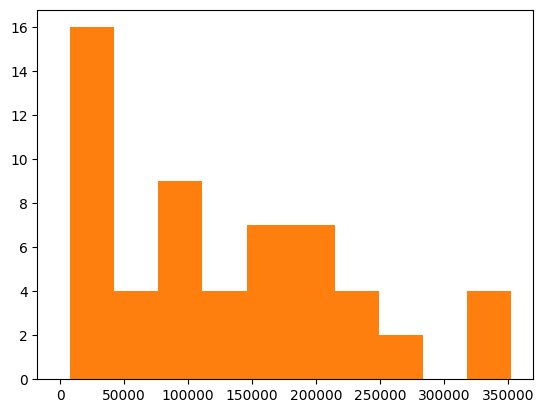

In [103]:
plt.hist(df_sub['dollars_per_min'])

In [104]:
spark.sql("""
select tpep_pickup_datetime, tpep_dropoff_datetime, tpep_dropoff_datetime - tpep_pickup_datetime, datediff(hour, tpep_pickup_datetime, tpep_dropoff_datetime), datediff(minute, tpep_pickup_datetime, tpep_dropoff_datetime)
from taxi
order by 3 desc
limit 10
""")

tpep_pickup_datetime,tpep_dropoff_datetime,(tpep_dropoff_datetime - tpep_pickup_datetime),"timestampdiff(hour, tpep_pickup_datetime, tpep_dropoff_datetime)","timestampdiff(minute, tpep_pickup_datetime, tpep_dropoff_datetime)"
2023-01-23 11:21:51,2023-01-30 10:31:02,INTERVAL '6 23:09...,167,10029
2023-02-23 14:59:05,2023-02-28 12:32:42,INTERVAL '4 21:33...,117,7053
2023-01-16 10:20:33,2023-01-20 17:19:57,INTERVAL '4 06:59...,102,6179
2023-03-09 13:31:29,2023-03-13 11:29:12,INTERVAL '3 21:57...,93,5637
2023-03-24 19:30:30,2023-03-28 11:34:03,INTERVAL '3 16:03...,88,5283
2023-03-13 21:23:58,2023-03-17 10:49:11,INTERVAL '3 13:25...,85,5125
2023-03-24 08:22:33,2023-03-27 13:08:12,INTERVAL '3 04:45...,76,4605
2023-03-03 12:53:19,2023-03-06 11:41:21,INTERVAL '2 22:48...,70,4248
2023-01-27 12:10:55,2023-01-30 10:31:14,INTERVAL '2 22:20...,70,4220
2023-02-23 17:46:36,2023-02-26 14:07:08,INTERVAL '2 20:20...,68,4100
